Importing libraries

In [131]:
import numpy as np 

In [132]:
import pandas as pd

In [133]:
from matplotlib import pyplot as plt

In [134]:
from sklearn.svm import SVC

In [135]:
from cvxopt import matrix as cmat

In [136]:
from cvxopt import solvers as csolve

Creating linealry separable datasets

In [137]:
x_neg = np.array([[3,4],[1,4],[2,3]]) * 1.
y_neg = np.array([-1,-1,-1]) * 1.

x_pos = np.array([[6,-1],[7,-1],[5,-3]]) * 1.
y_pos = np.array([1,1,1]) * 1.

In [138]:
x1 = np.linspace(-10,10)

In [139]:
# x = np.vstack((np.linspace(-10,10),np.linspace(-10,10)))


In [140]:
x = np.vstack((x_pos, x_neg))
y = np.concatenate((y_pos,y_neg))

In [141]:
# Guessing the parameters
w = np.array([1,-1]).reshape(-1,1)
b = -3

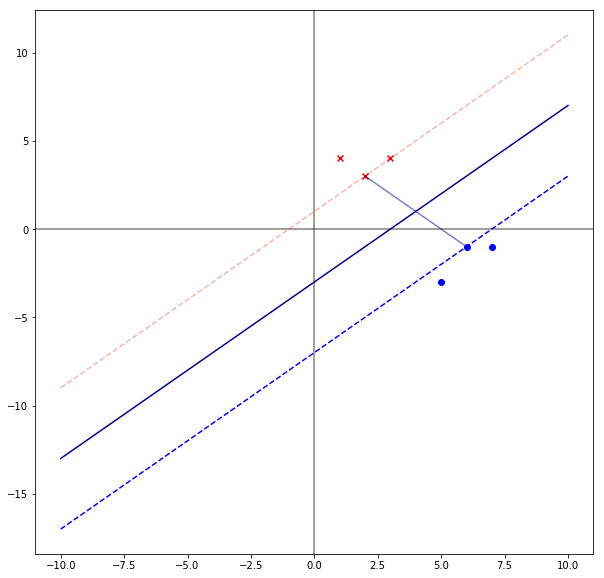

In [142]:
fig = plt.figure(figsize = (10,10))

plt.scatter(x_neg[:,0], x_neg[:,1], marker = 'x', color = 'r', label = 'Negative -1')
plt.scatter(x_pos[:,0], x_pos[:,1], marker = 'o', color = 'b',label = 'Positive +1')

plt.plot(x1, x1  - 3, color = 'darkblue')

plt.plot(x1, x1  - 7, linestyle = '--', color = 'b')
plt.plot(x1, x1  + 1, linestyle = '--', alpha = .3, color = 'r')

#Lines
plt.axvline(0, color = 'black', alpha = .5)
plt.axhline(0,color = 'black', alpha = .5)

plt.plot([2,6],[3,-1], linestyle = '-', color = 'darkblue', alpha = .5 )


Using notations explained in this pdf
https://static1.squarespace.com/static/58851af9ebbd1a30e98fb283/t/58902fbae4fcb5398aeb7505/1485844411772/SVM+Explained.pdf

In [143]:
m, n = x.shape

In [144]:
y = y.reshape(-1, 1)

In [145]:
x_tick = y * x

In [146]:
# m x m matrix
H = np.dot(x_tick, x_tick.T)

Converting these np matrices into CVXOPT format to be used with this API:

cvxopt.solvers.qp(P,  q[ ,  G,  h [,  A,  b[,  solver[,  initvals] ] ] ] )

In [147]:
P = cmat(H)

In [148]:
q = cmat(-np.ones((m, 1)))

In [149]:
G = cmat(-np.eye(m))

In [150]:
h = cmat(np.zeros(m))

In [151]:
A = cmat(y.reshape(1, -1))
A

<1x6 matrix, tc='d'>

In [152]:
b = cmat(np.zeros(1))

Setting solver parameters

In [153]:
csolve.options['show_progress'] = False

In [154]:
csolve.options['abstol'] = 1e-10

In [155]:
csolve.options['reltol'] = 1e-10

In [156]:
csolve.options['feastol'] = 1e-10

Run solver

In [157]:
sol = csolve.qp(P, q, G, h, A, b)

In [158]:
alphas = np.array(sol['x'])

In [159]:
alphas

array([[6.25000000e-02],
       [5.24439796e-12],
       [5.24422116e-12],
       [6.43702943e-06],
       [2.62217682e-12],
       [6.24935630e-02]])

In [160]:
w = ((y * alphas).T @ x).reshape(-1, 1)

In [161]:
# selecting indices with not very small values
# s = (alphas >= 1e-4).flatten()

In [162]:
# Computer b
b = y - x.dot(w)

In [163]:
print('Alphas = ', alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

Alphas =  [0.0625     0.06249356]
w =  [ 0.24999356 -0.25000644]
b =  [-0.74996781]


In [164]:
'''fig = plt.figure(figsize = (10,10))

plt.scatter(x_neg[:,0], x_neg[:,1], marker = 'x', color = 'r', label = 'Negative -1')
plt.scatter(x_pos[:,0], x_pos[:,1], marker = 'o', color = 'b',label = 'Positive +1')
print(w.shape)
print(x.shape)
print(b.shape)
x = np.linspace(-10, 10).reshape()
plt.plot(x, w*x + b, color='b')'''

"fig = plt.figure(figsize = (10,10))\n\nplt.scatter(x_neg[:,0], x_neg[:,1], marker = 'x', color = 'r', label = 'Negative -1')\nplt.scatter(x_pos[:,0], x_pos[:,1], marker = 'o', color = 'b',label = 'Positive +1')\nprint(w.shape)\nprint(x.shape)\nprint(b.shape)\nx = np.linspace(-10, 10).reshape()\nplt.plot(x, w*x + b, color='b')"

Implementing soft margin in SVM

In [165]:
# creating non linearly separable datasets
x_neg = np.array([[3,4],[1,4],[2,3]]) * 1.
y_neg = np.array([-1,-1,-1]) * 1.

x_pos = np.array([[6,-1],[7,-1],[5,-3], [2,4]]) * 1.
y_pos = np.array([1,1,1,1]) * 1.

In [166]:
x1 = np.linspace(-10,10)

In [167]:
x = np.vstack((x_pos, x_neg))
y = np.concatenate((y_pos,y_neg))

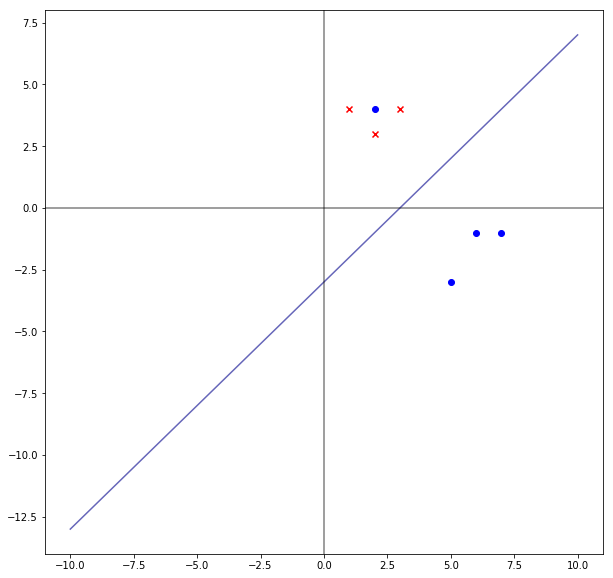

In [168]:
fig = plt.figure(figsize = (10,10))

plt.scatter(x_neg[:,0], x_neg[:,1], marker = 'x', color = 'r', label = 'Negative -1')
plt.scatter(x_pos[:,0], x_pos[:,1], marker = 'o', color = 'b',label = 'Positive +1')

plt.plot(x1, x1  - 3, color = 'darkblue', alpha = .6, label = 'Previous boundary')

plt.axvline(0, color = 'black', alpha = .5)
plt.axhline(0,color = 'black', alpha = .5)

plt.show()


In [169]:
c = 10

In [170]:
m, n = x.shape

In [171]:
y = y.reshape(-1, 1)

In [172]:
x_tick = y * x

In [173]:
# m x m matrix
H = np.dot(x_tick, x_tick.T)

Converting these np matrices into CVXOPT format to be used with this API:

cvxopt.solvers.qp(P,  q[ ,  G,  h [,  A,  b[,  solver[,  initvals] ] ] ] )

In [174]:
P = cmat(H)

In [175]:
q = cmat(-np.ones((m, 1)))

G and h will change in the soft margin case

In [176]:
G = cmat(np.vstack((-np.eye(m), np.eye(m))))

In [177]:
h = cmat(np.hstack((np.zeros(m), np.ones(m) * c)))

In [178]:
A = cmat(y.reshape(1, -1))
A

<1x7 matrix, tc='d'>

In [179]:
b = cmat(np.zeros(1))


In [180]:
sol = csolve.qp(P, q, G, h, A, b)

In [181]:
alphas = np.array(sol['x'])

In [182]:
alphas

array([[1.31250000e+00],
       [2.36607341e-12],
       [1.32909858e-11],
       [1.00000000e+01],
       [5.00000000e+00],
       [1.52461667e-12],
       [6.31250000e+00]])

In [183]:
w = ((y * alphas).T @ x).reshape(-1, 1)

In [184]:
# selecting indices with not very small values
s = (alphas >= 1e-4).flatten()

In [185]:
# Computer b
b = y[s] - x[s].dot(w)

In [186]:
print('Alphas = ', alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

Alphas =  [ 1.3125 10.      5.      6.3125]
w =  [ 0.25 -0.25]
b =  [-0.75]


Comparing with sklearn svm

In [187]:
clf = SVC(C=10, kernel='linear')

In [188]:
clf.fit(x, y.ravel())

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [189]:
print('w =', clf.coef_)

w = [[ 0.25 -0.25]]


In [190]:
print('b = ', clf.intercept_)

b =  [-0.75]


In [191]:
print('Support vector indices =', clf.support_ )

Support vector indices = [4 6 0 3]


In [192]:
print('Support Vectors = ', clf.support_vectors_)

Support Vectors =  [[ 3.  4.]
 [ 2.  3.]
 [ 6. -1.]
 [ 2.  4.]]
